In [1]:
""" First, let's import the data.
    It comes stock with scikit-learn.
"""
# load test data set
from sklearn.datasets import load_iris
iris = load_iris()

x_iris = iris.data
y_iris = iris.target

x = x_iris[:, :2]
y = y_iris

# split data set into test and real sets
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

x_train, x_test = train_test_split(x, test_size=0.25, random_state=33)
y_train, y_test = train_test_split(y, test_size=0.25, random_state=33)

# normalize test data so each feature has a mean of 0.0 and a std dev of 1.0
scaler_x = preprocessing.StandardScaler().fit(x_train)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)


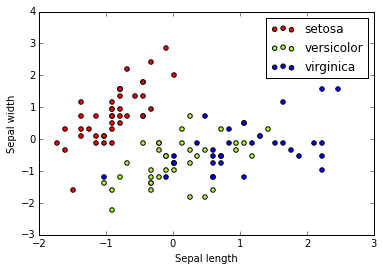

In [2]:
""" Now let's just make a quick plot of the data
    to take a look at it.
"""
%matplotlib inline
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']

for i in range(len(colors)):
    xs = x_train[:, 0][y_train == i]
    ys = x_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


In [3]:
""" Now let's use the Stochiast Gradient Descent linear
    fit model to classify the data into groups.
"""
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(x_train, y_train)

print(clf.coef_)
print(clf.intercept_)

[[-29.06809047   5.42667236]
 [  4.23244174  -1.21131079]
 [ 16.90314785   2.85869347]]
[ -3.53271651 -15.27692161 -17.80244363]


(-2, 2.5)

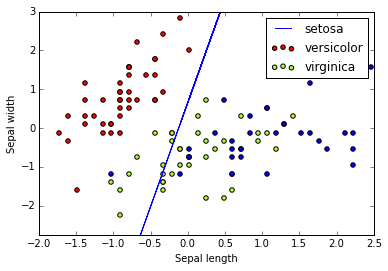

In [4]:
""" Okay, so what we have above are the parameters to fit three different lines.
    These lines represent the split of the tree different types of irisses.
    But to my eye, only the red is really well separated from the others,
    so we'll just plot the one more interesting fit line.
"""
import numpy as np

x_min = x_train[:, 0].min() - 0.5
x_max = x_train[:, 0].max() + 0.5
y_min = x_train[:, 1].min() - 0.5
y_max = x_train[:, 1].max() + 0.5

xs = np.arange(x_min, x_max, 0.5)

colors = ['red', 'greenyellow', 'blue']

for i in range(len(colors)):
    xs = x_train[:, 0][y_train == i]
    ys = x_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])

ys = (-clf.intercept_[0] - xs * clf.coef_[0, 0]) / clf.coef_[0, 1]
plt.plot(xs, ys, hold=True)
    
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.ylim(-2.75, 3)
plt.xlim(-2, 2.5)